# Understanding Deepfakes with Keras

![DCGAN](DCGAN.png)

# Task 1: Importing Libraries and Helper Functions

Please note: If you haven't already, please install the required packages by executing the code cell below.

In [2]:
%matplotlib notebook

import tensorflow as tf
import numpy as np
import os
import tfutils

from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose, Reshape, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from PIL import Image

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.1.0


# Task 2: Importing and Plotting the Data

In [3]:
(x_train,y_train),(x_test,y_test)= tfutils.datasets.mnist.load_data(one_hot=False)

x_train=tfutils.datasets.mnist.load_subset([0],x_train,y_train)
x_test=tfutils.datasets.mnist.load_subset([0],x_test,y_test)

x=np.concatenate([x_train,x_test],axis=0)

<IPython.core.display.Javascript object>


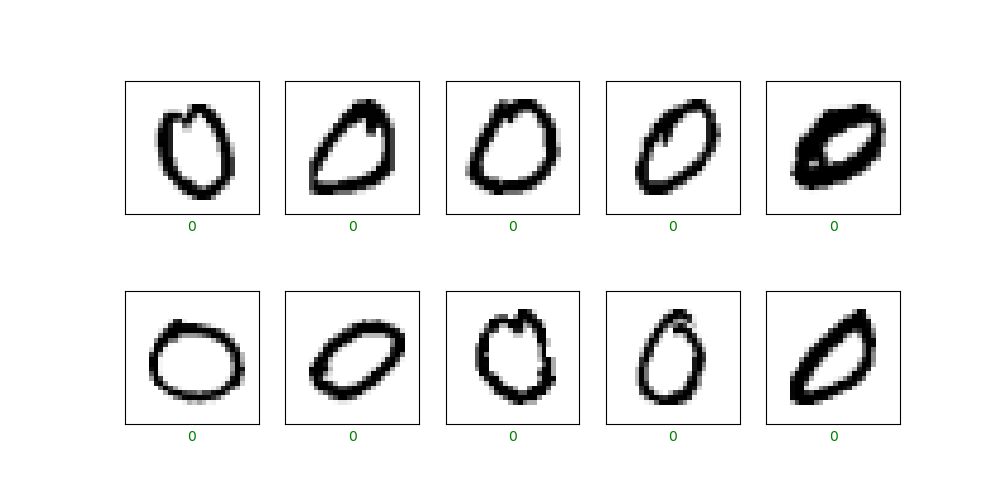

In [4]:
tfutils.datasets.mnist.plot_ten_random_examples(plt,x,np.zeros((x.shape[0],1))).show()

# Task 3: Discriminator

![Artist and Critic](artist_critic.png)

In [5]:
discriminator = Sequential([
    
    Conv2D(64, 3, strides=2,input_shape=(28,28,1)),
    LeakyReLU(),
    BatchNormalization(),
    
    Conv2D(64, 5, strides=2,input_shape=(28,28,1)),
    LeakyReLU(),
    BatchNormalization(),
    
    Conv2D(256, 5, strides=2,input_shape=(28,28,1)),
    LeakyReLU(),
    BatchNormalization(),
    
    Flatten(),
    Dense(1,activation='sigmoid')
    
  
])

opt=tf.keras.optimizers.Adam(lr=2e-4,beta_1=0.5)
discriminator.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 64)          102464    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 256)         4

# Task 4: Generator

In [6]:
generator = Sequential([
    Dense(256,activation='relu',input_shape=(1,)),
    Reshape((1,1,256))
    
    
    Conv2DTranspose(256, 5, activation='relu'),
    BatchNormalization(),
    
    Conv2DTranspose(128,5,activation='relu'),
    BatchNormalization(),
    
    
    Conv2DTranspose(64,5,activation='relu'),
    BatchNormalization(),
    
    Conv2DTranspose(32,5,activation='relu'),
    BatchNormalization(),
    
    Conv2DTranspose(1,4,activation='sigmoid')
    
])

generator.summary()

SyntaxError: invalid syntax (<ipython-input-6-423d8073da4a>, line 6)

In [7]:
noise=np.random.randn(1,1)
gen_image=generator.predict(noise)[0]

plt.figure()
plt.imshow(np.reshape(gen_image,(28,28)),cmap='binary')


NameError: name 'generator' is not defined

# Task 5: Generative Adversarial Network (GAN)

In [ ]:
input_layer=tf.keras.layers.Input(shape=(1,))
gen_out = generator(input_layer)
disc_out= discriminator(gen_out)

gan = Model(
    input_layer,
    disc_out
)
 discriminator.trainable=False   
    gan.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    gan.summary()

# Tasks 6 and 7: Training the GAN

In [8]:
epochs=25
batch_size=125

steps_per_epoch = int(2*x.shape[0]/batch_size)
print('Steps per epoch=',steps_per_epoch)





Steps per epoch= 110


<IPython.core.display.Javascript object>


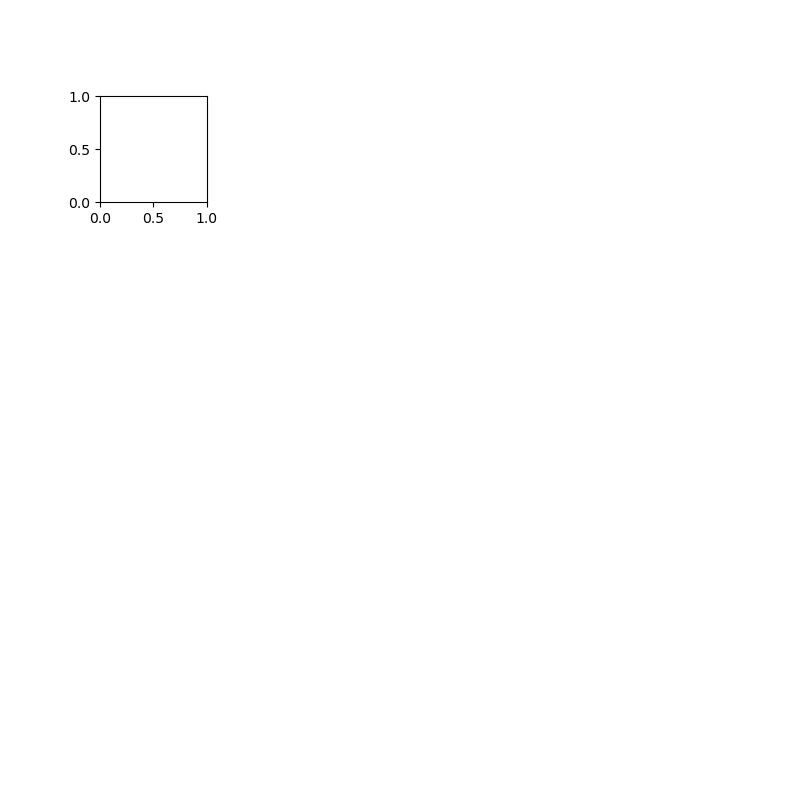

AttributeError: module 'numpy.random' has no attribute 'radn'

In [9]:
dp = tfutils.plotting.DynamicPlot(plt,5,5,(8,8))

for e in range(0,epochs):
    dp.start_of_epoch(e)
    
    for step in range(0,steps_per_epoch):
        true_examples = x[int(batch_size/2)*step:int(batch_size/2)*(step+1)]
        true_examples = np.reshape(true_examples,(true_examples.shape[0],28,28,1))
        
        noise=np.random.radn(int(batch_size/2),1)
        gen_examples = generator.predict(noise)
        
        x_batch = np.concatenate([gen_examples,true_examples],axis=0)
        y_batch = np.array([0]*int(batch_size/2) + [1]*int(batch_size/2))
        
        indices = np.random.choice(range(batch_size),batch_size,replace=False)
        
        x_batch = x_batch[indices]
        y_batch=y_batch[indices]
        
        discriminator.trainable = True
        discriminator.train_on_batch(x_batch,y_batch)
        discriminator.trainable = False
        
        
        loss,_=gan.train_on_batch(noise,np.ones((int(batch_size/2),1)))
        _,acc = discriminator.evaluate(x_batch,y_batch,verbose=False)
        
        
        noise=np.random.randn(1,1)
        gen_image=generator.predict(noise)[0]
        gen_image = np.reshape(gen_image,(28,28))
        dp.end_of_epoch(gen_image,'binary','DiscAcc:{:.2f}'.format(acc),'GANLoss:{:.2f}'.format(loss))
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        